In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

### EDA

In [3]:
df = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedMachineLearning/Data/Carseats.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
#transform categorical values of  US and Urban into numbers via labelencoder, and Shelve Loc with manuaally replacing values to determine order
print(df["ShelveLoc"].value_counts())

le = LabelEncoder()
df["US"] = le.fit_transform(df["US"])
df["Urban"] = le.fit_transform(df["Urban"])

shelveloc_replacement = {"Bad":0, "Medium":1, "Good":2}
df["ShelveLoc"] = df["ShelveLoc"].map(shelveloc_replacement)

df.head()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,0.972500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.672961,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,1.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,1.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [7]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

array([[<AxesSubplot: title={'center': 'Sales'}>,
        <AxesSubplot: title={'center': 'CompPrice'}>,
        <AxesSubplot: title={'center': 'Income'}>],
       [<AxesSubplot: title={'center': 'Advertising'}>,
        <AxesSubplot: title={'center': 'Population'}>,
        <AxesSubplot: title={'center': 'Price'}>],
       [<AxesSubplot: title={'center': 'ShelveLoc'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Education'}>],
       [<AxesSubplot: title={'center': 'Urban'}>,
        <AxesSubplot: title={'center': 'US'}>, <AxesSubplot: >]],
      dtype=object)

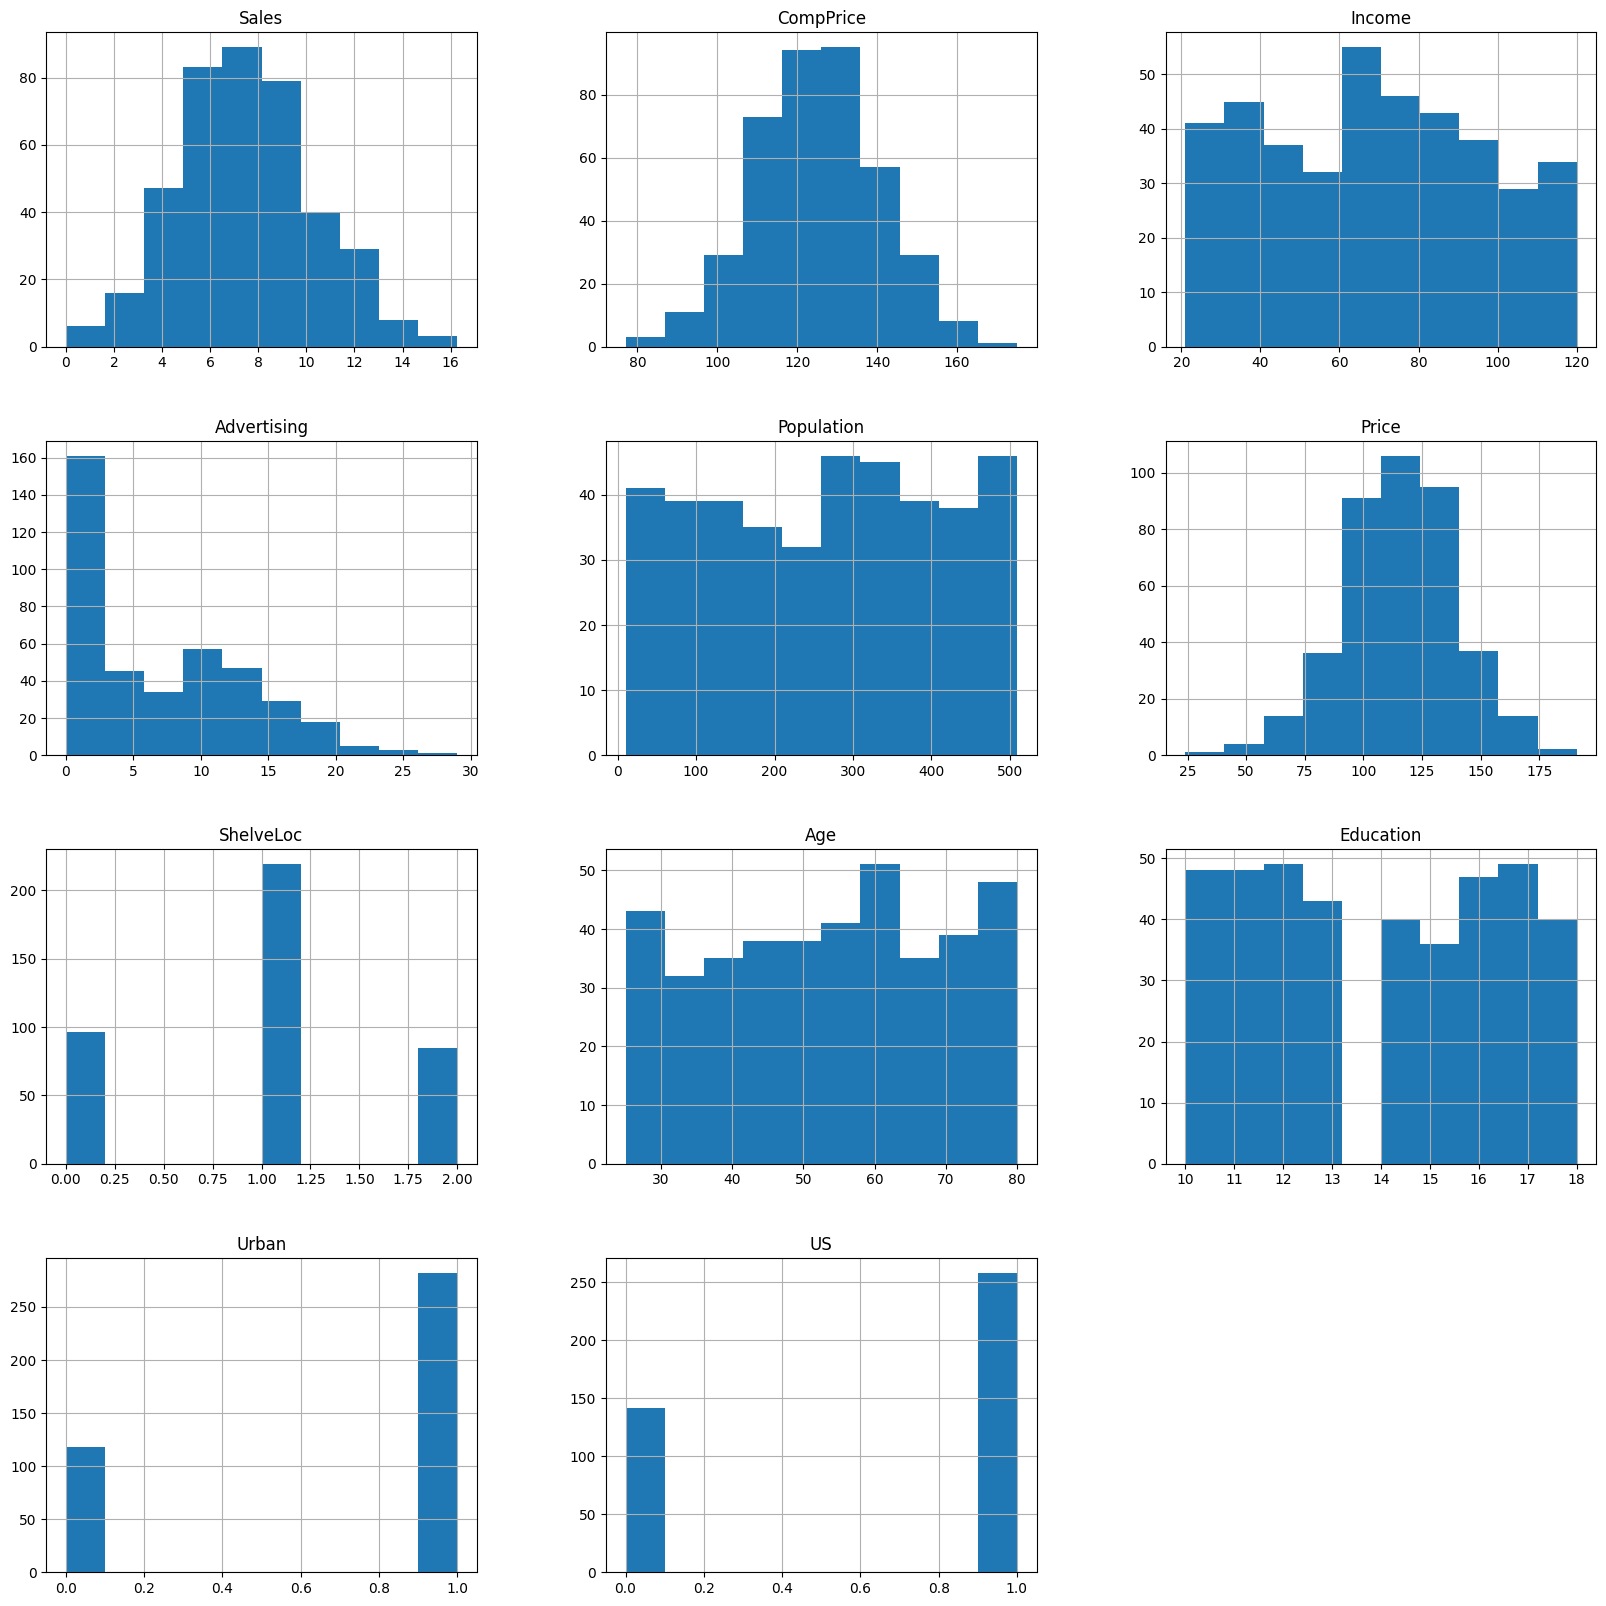

In [8]:
df.hist(bins=10, figsize=(20,20))

No missing values, no outliers, normal distribution of sales 
could normalize data 

Seems to be cheaper than competitors
around 65 % of our customers are from US
equal share of all education level and age, similar for income
Most shelve location is medium
Majority of stores in urban area

In [9]:
#create column showing price difference between competitors and us

df["Pricediff"] = df["CompPrice"] - df["Price"]
df.head()

#positive number when we are cheaper and negative when we are more expensive

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Pricediff
0,9.50,138,73,11,276,120,0,42,17,1,1,18
1,11.22,111,48,16,260,83,2,65,10,1,1,28
2,10.06,113,35,10,269,80,1,59,12,1,1,33
3,7.40,117,100,4,466,97,1,55,14,1,1,20
4,4.15,141,64,3,340,128,0,38,13,1,0,13


In [10]:
#correlation matrix 
corr_matrix = df.corr()
corr_matrix["Sales"].sort_values(ascending=False)

Sales          1.000000
Pricediff      0.597922
ShelveLoc      0.554458
Advertising    0.269507
US             0.177093
Income         0.151951
CompPrice      0.064079
Population     0.050471
Urban         -0.015419
Education     -0.051955
Age           -0.231815
Price         -0.444951
Name: Sales, dtype: float64

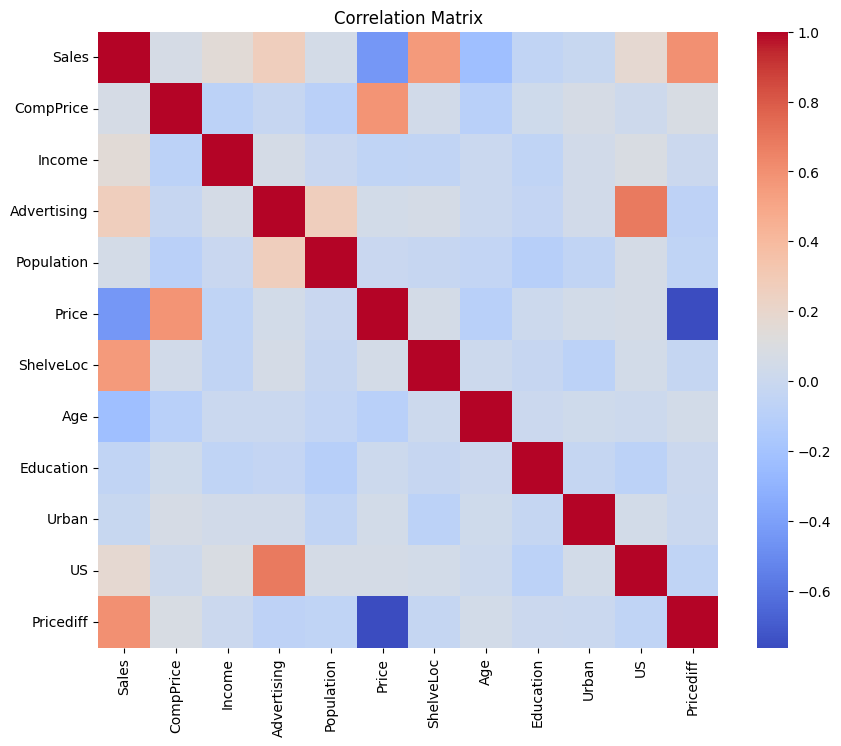

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Biggest positive correlation with price difference between us and competitors, shelve loc, advertising, and US

negative correlation with age, and price

Price seems to be a very important purchasing factor

### Check feature importance with pca

In [12]:
#exclude sales because it is target variable
x = df.iloc[:, 1:]
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Pricediff
0,138,73,11,276,120,0,42,17,1,1,18
1,111,48,16,260,83,2,65,10,1,1,28
2,113,35,10,269,80,1,59,12,1,1,33
3,117,100,4,466,97,1,55,14,1,1,20
4,141,64,3,340,128,0,38,13,1,0,13


In [13]:
components = None
pca = PCA(n_components = components) #or n_components = desired % of variance explained
# perform PCA on the scaled data
pca.fit(x)

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[9.05892403e+01 3.69315318e+00 3.20938600e+00 1.26271873e+00
 1.04369401e+00 1.70383312e-01 2.82155790e-02 1.87775601e-03
 8.46143157e-04 4.84966707e-04 1.74255269e-31]



In [14]:
#get cumulative variance
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 90.58924032  94.2823935   97.49177951  98.75449823  99.79819224
  99.96857556  99.99679113  99.99866889  99.99951503 100.
 100.        ]



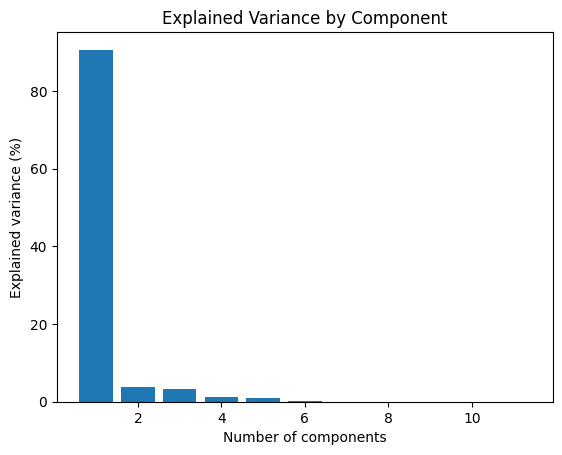

In [15]:
# Number of components you want to display
components = len(pca.explained_variance_ratio_) if components is None else components

# Create a bar chart
plt.bar(range(1, components + 1), pca.explained_variance_ratio_ * 100)

plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.title("Explained Variance by Component")

# Show the bar chart
plt.show()

In [16]:
#how much each feature contribures to each component
pca_components = abs(pca.components_)

In [17]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {x.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['Population', 'Advertising', 'CompPrice', 'Pricediff']
Component 1: ['Price', 'Pricediff', 'Income', 'CompPrice']
Component 2: ['Income', 'Price', 'Pricediff', 'CompPrice']
Component 3: ['CompPrice', 'Pricediff', 'Age', 'Price']
Component 4: ['Age', 'CompPrice', 'Pricediff', 'Price']
Component 5: ['Advertising', 'US', 'Income', 'Pricediff']
Component 6: ['Education', 'US', 'ShelveLoc', 'Urban']
Component 7: ['ShelveLoc', 'Urban', 'Education', 'Advertising']
Component 8: ['Urban', 'ShelveLoc', 'US', 'Education']
Component 9: ['US', 'Advertising', 'Education', 'Urban']
Component 10: ['CompPrice', 'Price', 'Pricediff', 'US']


Confirms that Price, Pricediff and advertising are most important features

Is population relevant? as it is in first component on first place? No correlation in correlation matrix and only in first component under top 4


In [18]:
#create train and test dataset
X = df.iloc[:, 1:]
y = df.iloc[:, 0:1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)